In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Ploting and Visualization

There are a handful of third-party Python packages that are suitable for creating scientific plots and visualizations. These include packages like:

matplotlib

Chaco

PyX

Bokeh

Here, we will focus excelusively on matplotlib and the high-level plotting availabel within pandas. It is currently the most robust and feature-rich package available.

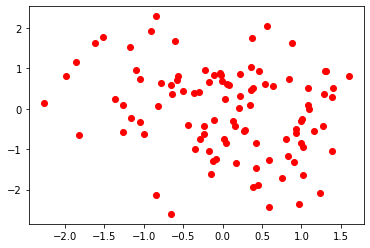

In [9]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), "ro")

The above plot simply shows two sets of random numbers taken from a normal distribution plotted against one another. 

The 'ro' argument is a shorthand argument telling matplotlib that I wanted the points represented as red circles.

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make 

reasonable assumptions about how the plot should look.

<AxesSubplot:>

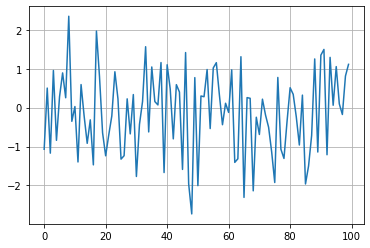

In [20]:
normals = pd.Series(np.random.normal(size = 100))
normals.plot(grid = True)

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

<AxesSubplot:>

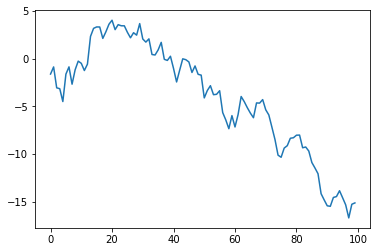

In [17]:
normals.cumsum().plot(grid = False)

Similarly for DataFrame:

<AxesSubplot:>

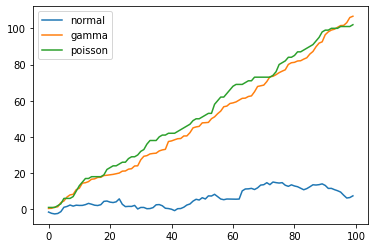

In [22]:
variables = pd.DataFrame({"normal": np.random.normal(size = 100),
                         "gamma": np.random.gamma(1, size=100),
                          "poisson": np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplot with single argument

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

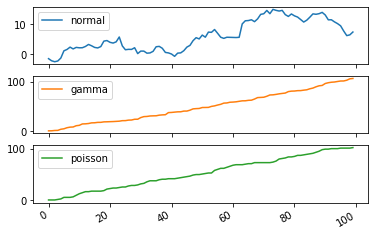

In [23]:
variables.cumsum(0).plot(subplots = True)

Or we my want to have some series displayed on the secondary y-axis, which can allow fro greater detail and less empty space:

<AxesSubplot:>

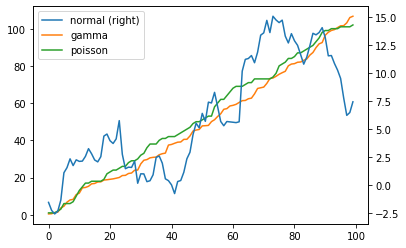

In [24]:
variables.cumsum(0).plot(secondary_y = "normal")

If we would like a little more control, we can use matplotlib's subplots function directly, and manually assign plots to its axes:

C:\Users\RAKORT\anaconda3\envs\newenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\RAKORT\anaconda3\envs\newenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\RAKORT\anaconda3\envs\newenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0, 0.5, 'cumulative sum')

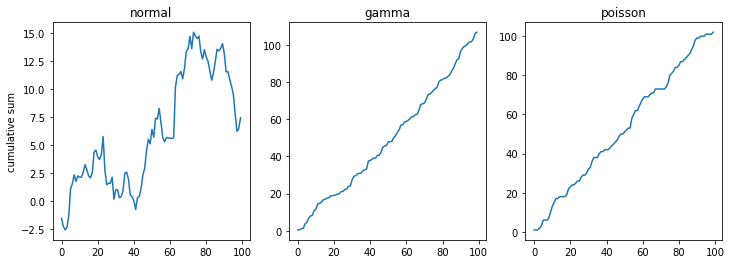

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols =3, figsize=(12,4))
for i, var in enumerate(["normal","gamma","poisson"]):
    variables[var].cumsum(0).plot(ax = axes[i], title = var)
axes[0].set_ylabel("cumulative sum")

## Bar Plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the plot method with a kind='bar' argument.

let's load up the Titanic dataset:

In [28]:
titanic = pd.read_excel("titanic.xls")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

<AxesSubplot:xlabel='pclass'>

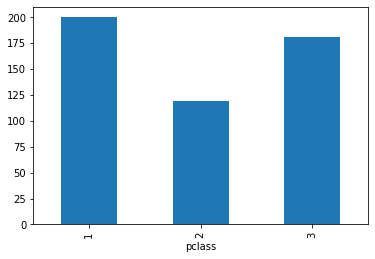

In [29]:
titanic.groupby("pclass").survived.sum().plot(kind="bar")

<AxesSubplot:ylabel='sex,pclass'>

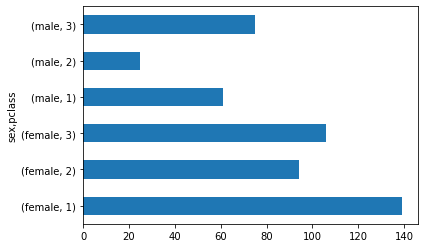

In [31]:
titanic.groupby(["sex","pclass"]).survived.sum().plot(kind="barh")

<AxesSubplot:xlabel='pclass,sex'>

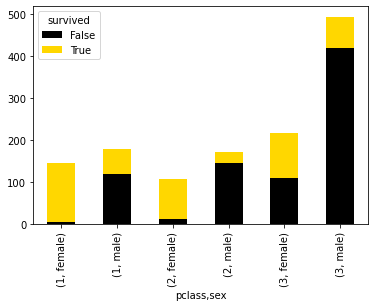

In [33]:
death_count = pd.crosstab([titanic.pclass,titanic.sex], titanic.survived.astype(bool))
death_count.plot(kind = "bar",stacked = True, color = ["black","gold"],grid = False)

Another way of comparing the groups is to look at the survival rate, by adjusting for the number of people in each group.

<AxesSubplot:ylabel='pclass,sex'>

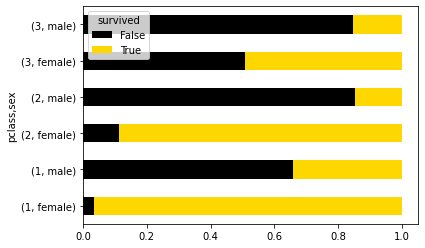

In [39]:
death_count.div(death_count.sum(1).astype(float),axis = 0).plot(kind ="barh",stacked =True, color = ["black","gold"])

## Histogram

Frequenfly it is useful to look at the distribution of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

<AxesSubplot:>

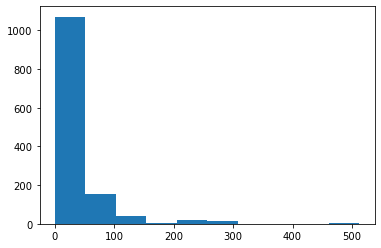

In [41]:
titanic.fare.hist(grid = False)

The hist method puts the continuous fare values into bins, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

<AxesSubplot:>

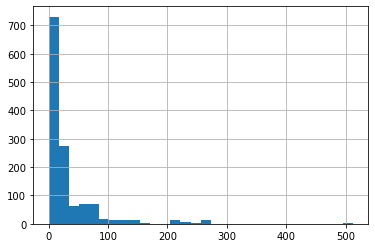

In [42]:
titanic.fare.hist(bins = 30)

A density plot is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an estimate of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the plot method with kind='kde', where kde stands for kernel density estimate.

<AxesSubplot:ylabel='Density'>

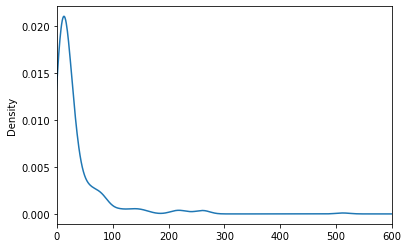

In [43]:
titanic.fare.dropna().plot(kind="kde",xlim=(0,600))

## Box Ploting

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

<AxesSubplot:title={'center':'fare'}, xlabel='pclass'>

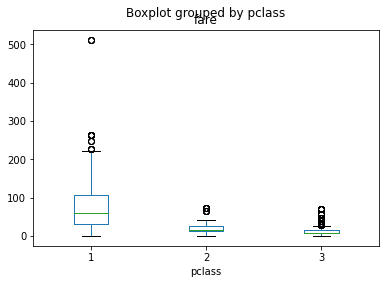

In [44]:
titanic.boxplot(column = "fare", by = "pclass", grid =False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

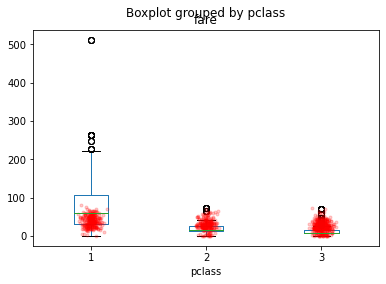

In [49]:
bp = titanic.boxplot(column = "fare", by = "pclass", grid =False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass == i].dropna()
    # Add some random "jitter" to x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    bp.plot(x, y, "r.", alpha = 0.2)

When data are dense, a couple of tricks used above help the visualization:

1-reducing the alpha level to make the points partially transparent

2-adding random "jitter" along the x-axis to avoid overstriking

A related but inferior cousin of the box plot is the so-called dynamite plot, which is just a bar chart with half of an error bar.

<AxesSubplot:xlabel='pclass'>

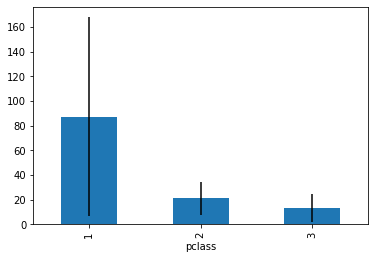

In [51]:
titanic.groupby("pclass")["fare"].mean().plot(kind = "bar",yerr = titanic.groupby("pclass")["fare"].std())

Why is this plot a poor choice?

-bar charts should be used for measurable quantities (e.g. raw data), not estimates. The area of the bar does not represent anything, since these are estimates derived from the data.

-the "data-ink ratio" (sensu Edward Tufte) is very high. There are only 6 values represented here (3 means and 3 standard deviations).

-the plot hides the underlying data.

A boxplot is always a better choice than a dynamite plot.

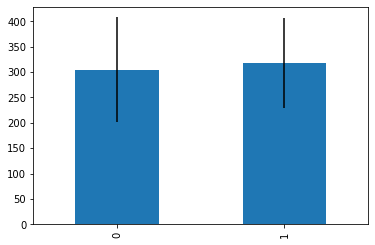

In [52]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [255,380]
fake_data = pd.DataFrame([data1,data2]).transpose()
p = fake_data.mean().plot(kind="bar",yerr = fake_data.std(),grid = False)

## Scatter Plots

To look at how Pandas does scatterplots, let's reload the baseball sample dataset.

In [55]:
baseball = pd.read_csv("baseball.csv")
baseball.head()

            PLAYER  Record_ID#   SALARY  ROOKIE  POS    G   PA   AB   H  1B  \
0       Gregg Zaun           1  3750000       0    2   85  288  245  58  40   
1     Henry Blanco           2  3175000       0    2   54  128  120  35  29   
2      Moises Alou           7  7500000       0    7   15   54   49  17  15   
3  Corey Patterson           9  3000000       0    8  123  392  366  75  46   
4      Rod Barajas          10   700000       0    2  100  377  349  87  53   

   ...  R3  R1_BI  R2_BI  R3_BI  ROB  OBI  R1BI%  R2BI%  R3BI%  OBI%  
0  ...  39      2      9     13  203   24    2.2   12.0   33.3  11.8  
1  ...  18      1      2      6  107    9    1.9    5.4   33.3   8.4  
2  ...   7      0      4      5   33    9    0.0   40.0   71.4  27.3  
3  ...  37      3      6     15  218   24    2.6    9.0   40.5  11.0  
4  ...  52     10     11     17  275   38    6.8   14.5   32.7  13.8  

[5 rows x 134 columns]

Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function scatter.

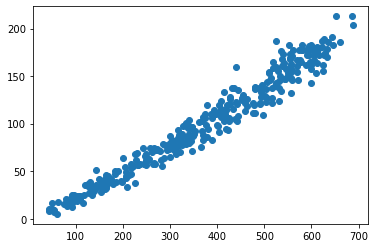

In [57]:
plt.scatter(baseball.AB, baseball.H)